In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [31]:
sim <- read_csv("analysis/features_normalized/mrxcat_simulation/features.csv") %>%
  separate(file, into=c("noise", "seed"), sep="_") %>%
  mutate(patient="sim")

Rows: 480 Columns: 838
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (4): file, image_path, segmentation_path, extraction_ID
dbl (829): ID, original_shape_Elongation, original_shape_MajorAxisLength, or...
lgl   (5): original_shape_Flatness, original_shape_LeastAxisLength, wavelet-...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [83]:
ranks_sim <- read_csv("analysis/tables/rank_table_simulation.csv") %>% select(-filter, -feature_class) %>% mutate(patient="sim")

Rows: 819 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): filter, feature_class, Feature_name
dbl (2): mae.y, rank

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [24]:
acdc <- dir("analysis/features_normalized/ACDC/", full.names = TRUE) %>% map_df(read_csv) %>%
  separate(file, into=c("patient", "noise", "seed"), sep="_")

Rows: 630 Columns: 838
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (4): file, image_path, segmentation_path, extraction_ID
dbl (828): ID, original_shape_Elongation, original_shape_MajorAxisLength, or...
lgl   (6): original_shape_Flatness, original_shape_LeastAxisLength, wavelet-...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 630 Columns: 838
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (4): file, image_path, segmentation_path, extraction_ID
dbl (828): ID, original_shape_Elongation, original_shape_MajorAxisLength, or...
lgl   (6): original_shape_Flatness, original_shape_LeastAxisLength, wavelet-...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 73

In [59]:
enname <- function(x) {
  names(x) <- x
  x
}

In [68]:
ranks_acdc <- dir("analysis/tables/ACDC", full.names = TRUE) %>%
  enname() %>%
  map_df(read_csv, .id="patient") %>%
  mutate(patient = str_remove(patient, ".*ranks_"), patient=str_remove(patient, ".csv"))

Rows: 819 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Feature_name
dbl (2): mae, rank

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 819 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Feature_name
dbl (2): mae, rank

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 819 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Feature_name
dbl (2): mae, rank

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 819 Columns: 3
── Column specification ────────────────

In [28]:
bae <- dir("analysis/features_normalized/subject/", full.names = TRUE) %>% map_df(read_csv) %>%
  separate(file, into=c("patient", "noise", "seed"), sep="_")


Rows: 1050 Columns: 838
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (4): file, image_path, segmentation_path, extraction_ID
dbl (828): ID, original_shape_Elongation, original_shape_MajorAxisLength, or...
lgl   (6): original_shape_Flatness, original_shape_LeastAxisLength, wavelet-...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1050 Columns: 838
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (4): file, image_path, segmentation_path, extraction_ID
dbl (829): ID, original_shape_Elongation, original_shape_MajorAxisLength, or...
lgl   (5): original_shape_Flatness, original_shape_LeastAxisLength, wavelet-...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 

In [77]:
ranks_bae <- dir("analysis/tables/subject", full.names = TRUE) %>%
  enname() %>%
  map_df(read_csv, .id="patient") %>%
  mutate(patient = str_remove(patient, ".*ranks_"), patient=str_remove(patient, ".csv"))

Rows: 819 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): filter, feature_class, feature, Feature_name
dbl (2): mae, rank

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 819 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): filter, feature_class, feature, Feature_name
dbl (2): mae, rank

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 819 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): filter, feature_class, feature, Feature_name
dbl (2): mae, rank

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_typ

In [13]:
feature_name <- "wavelet-LLL_gldm_LowGrayLevelEmphasis"

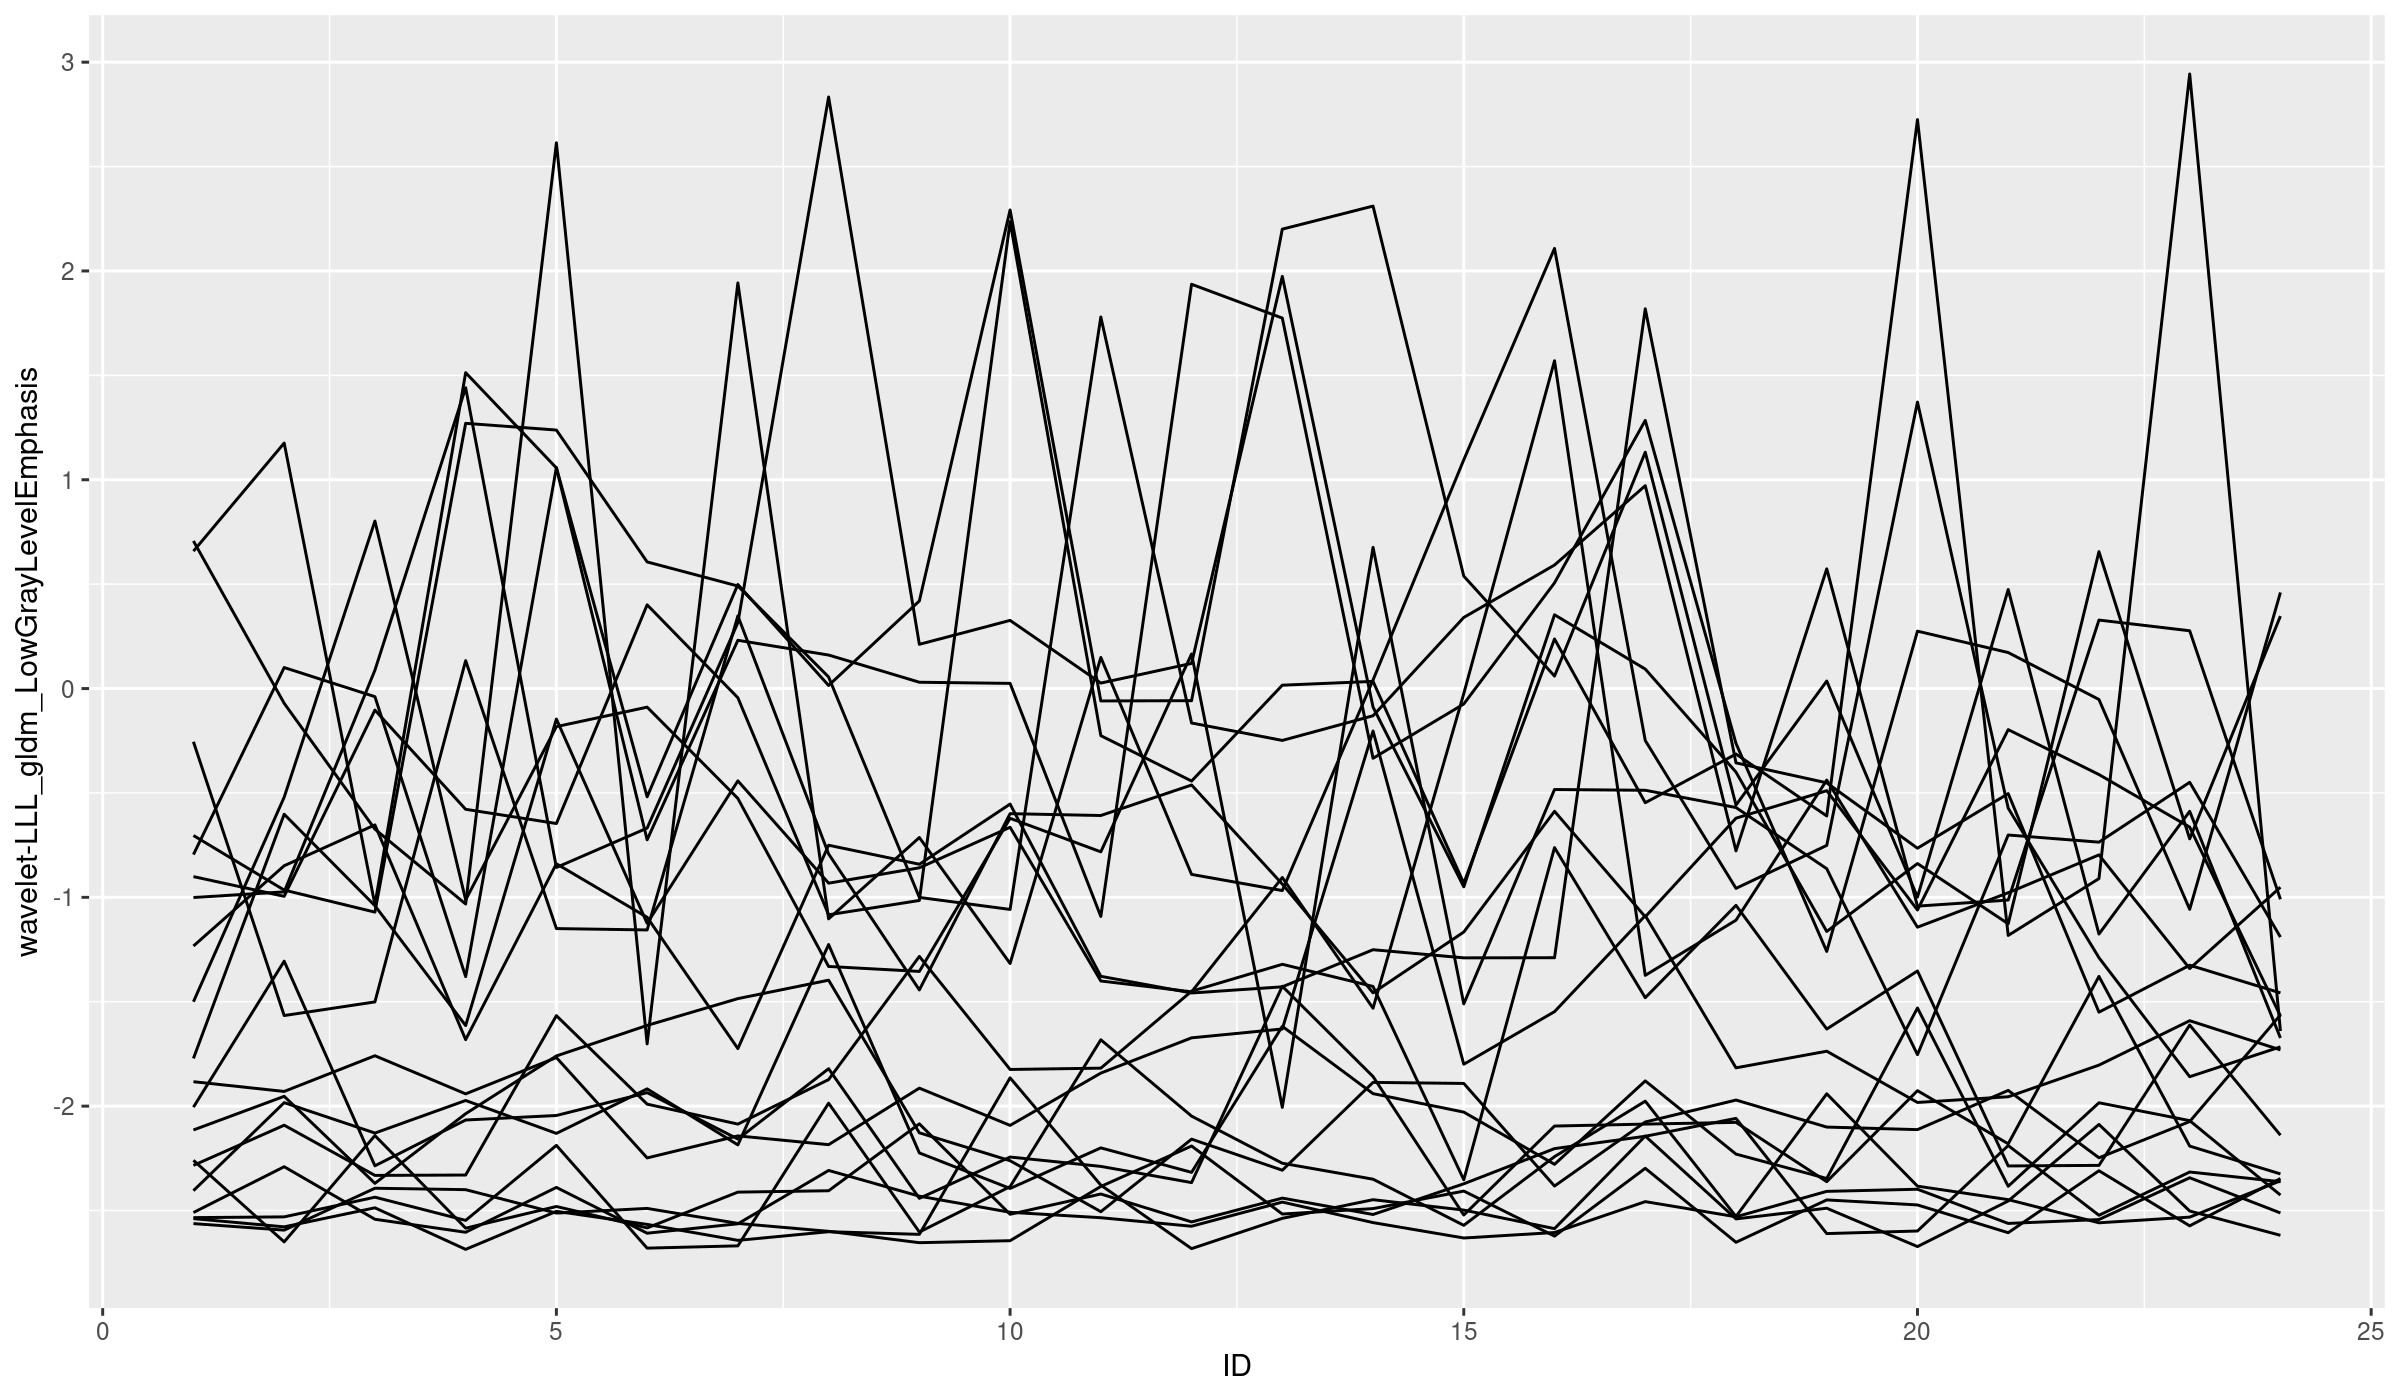

In [17]:
sim %>%
  ggplot(aes(x=ID, y=.data[[feature_name]], group=file)) + geom_line()

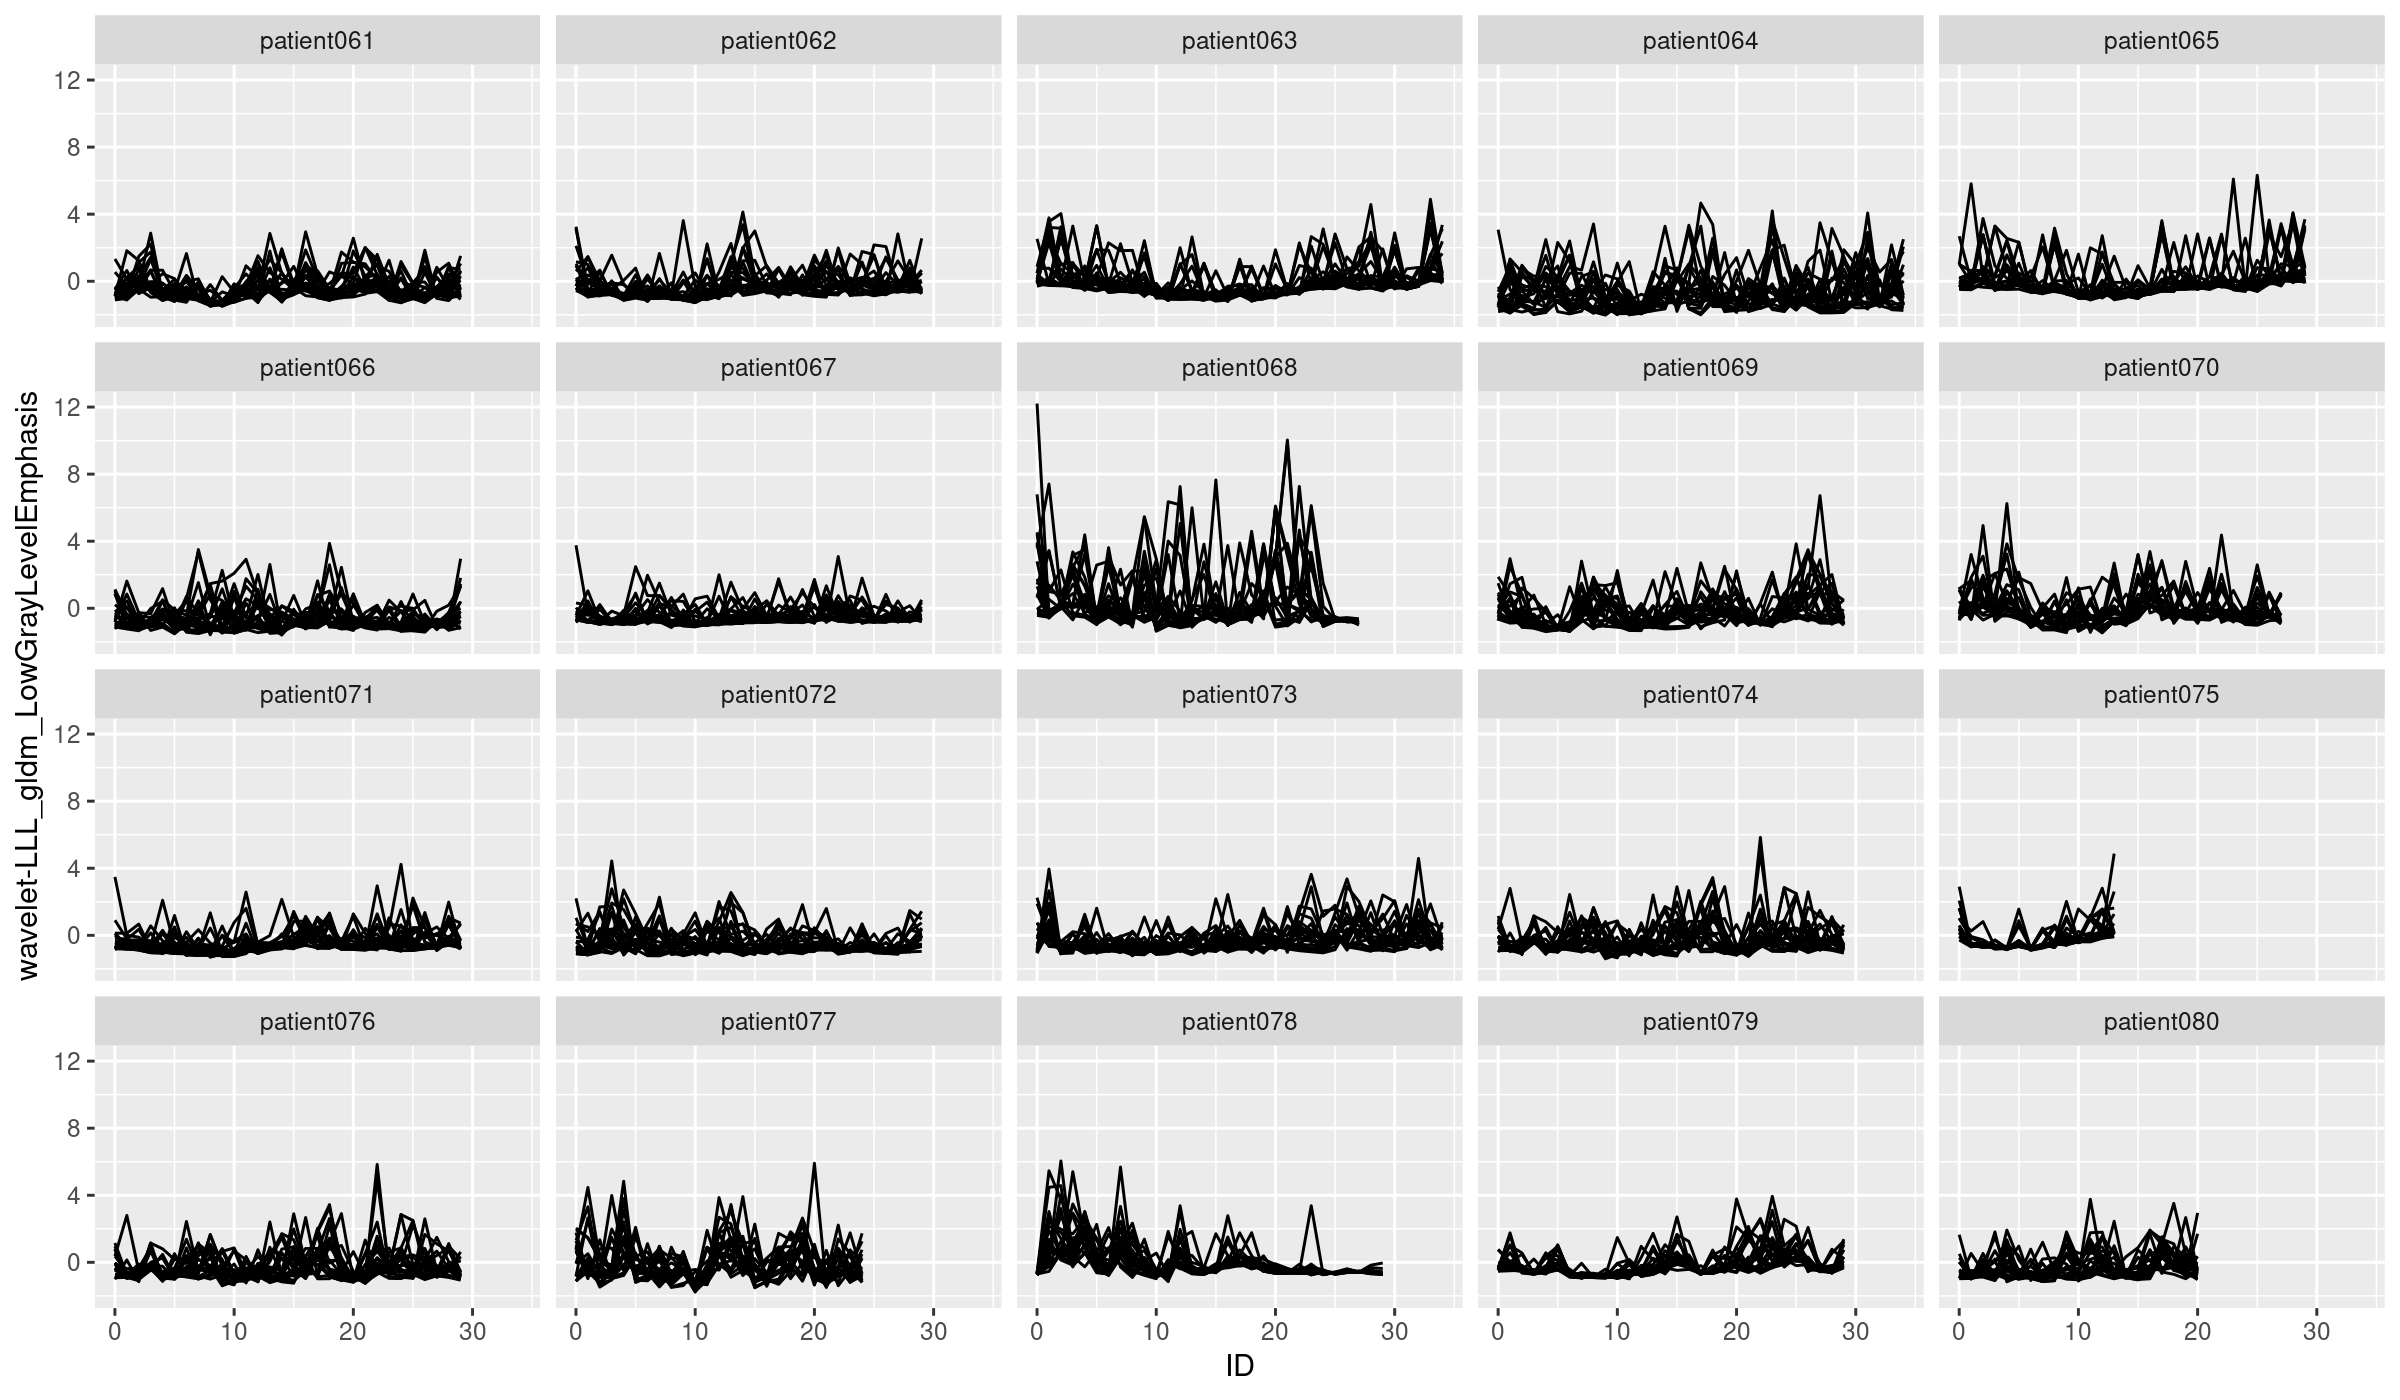

In [27]:
acdc %>%
  ggplot(aes(x=ID, y=.data[[feature_name]], group=interaction(noise, seed))) + geom_line() + facet_wrap(~patient)

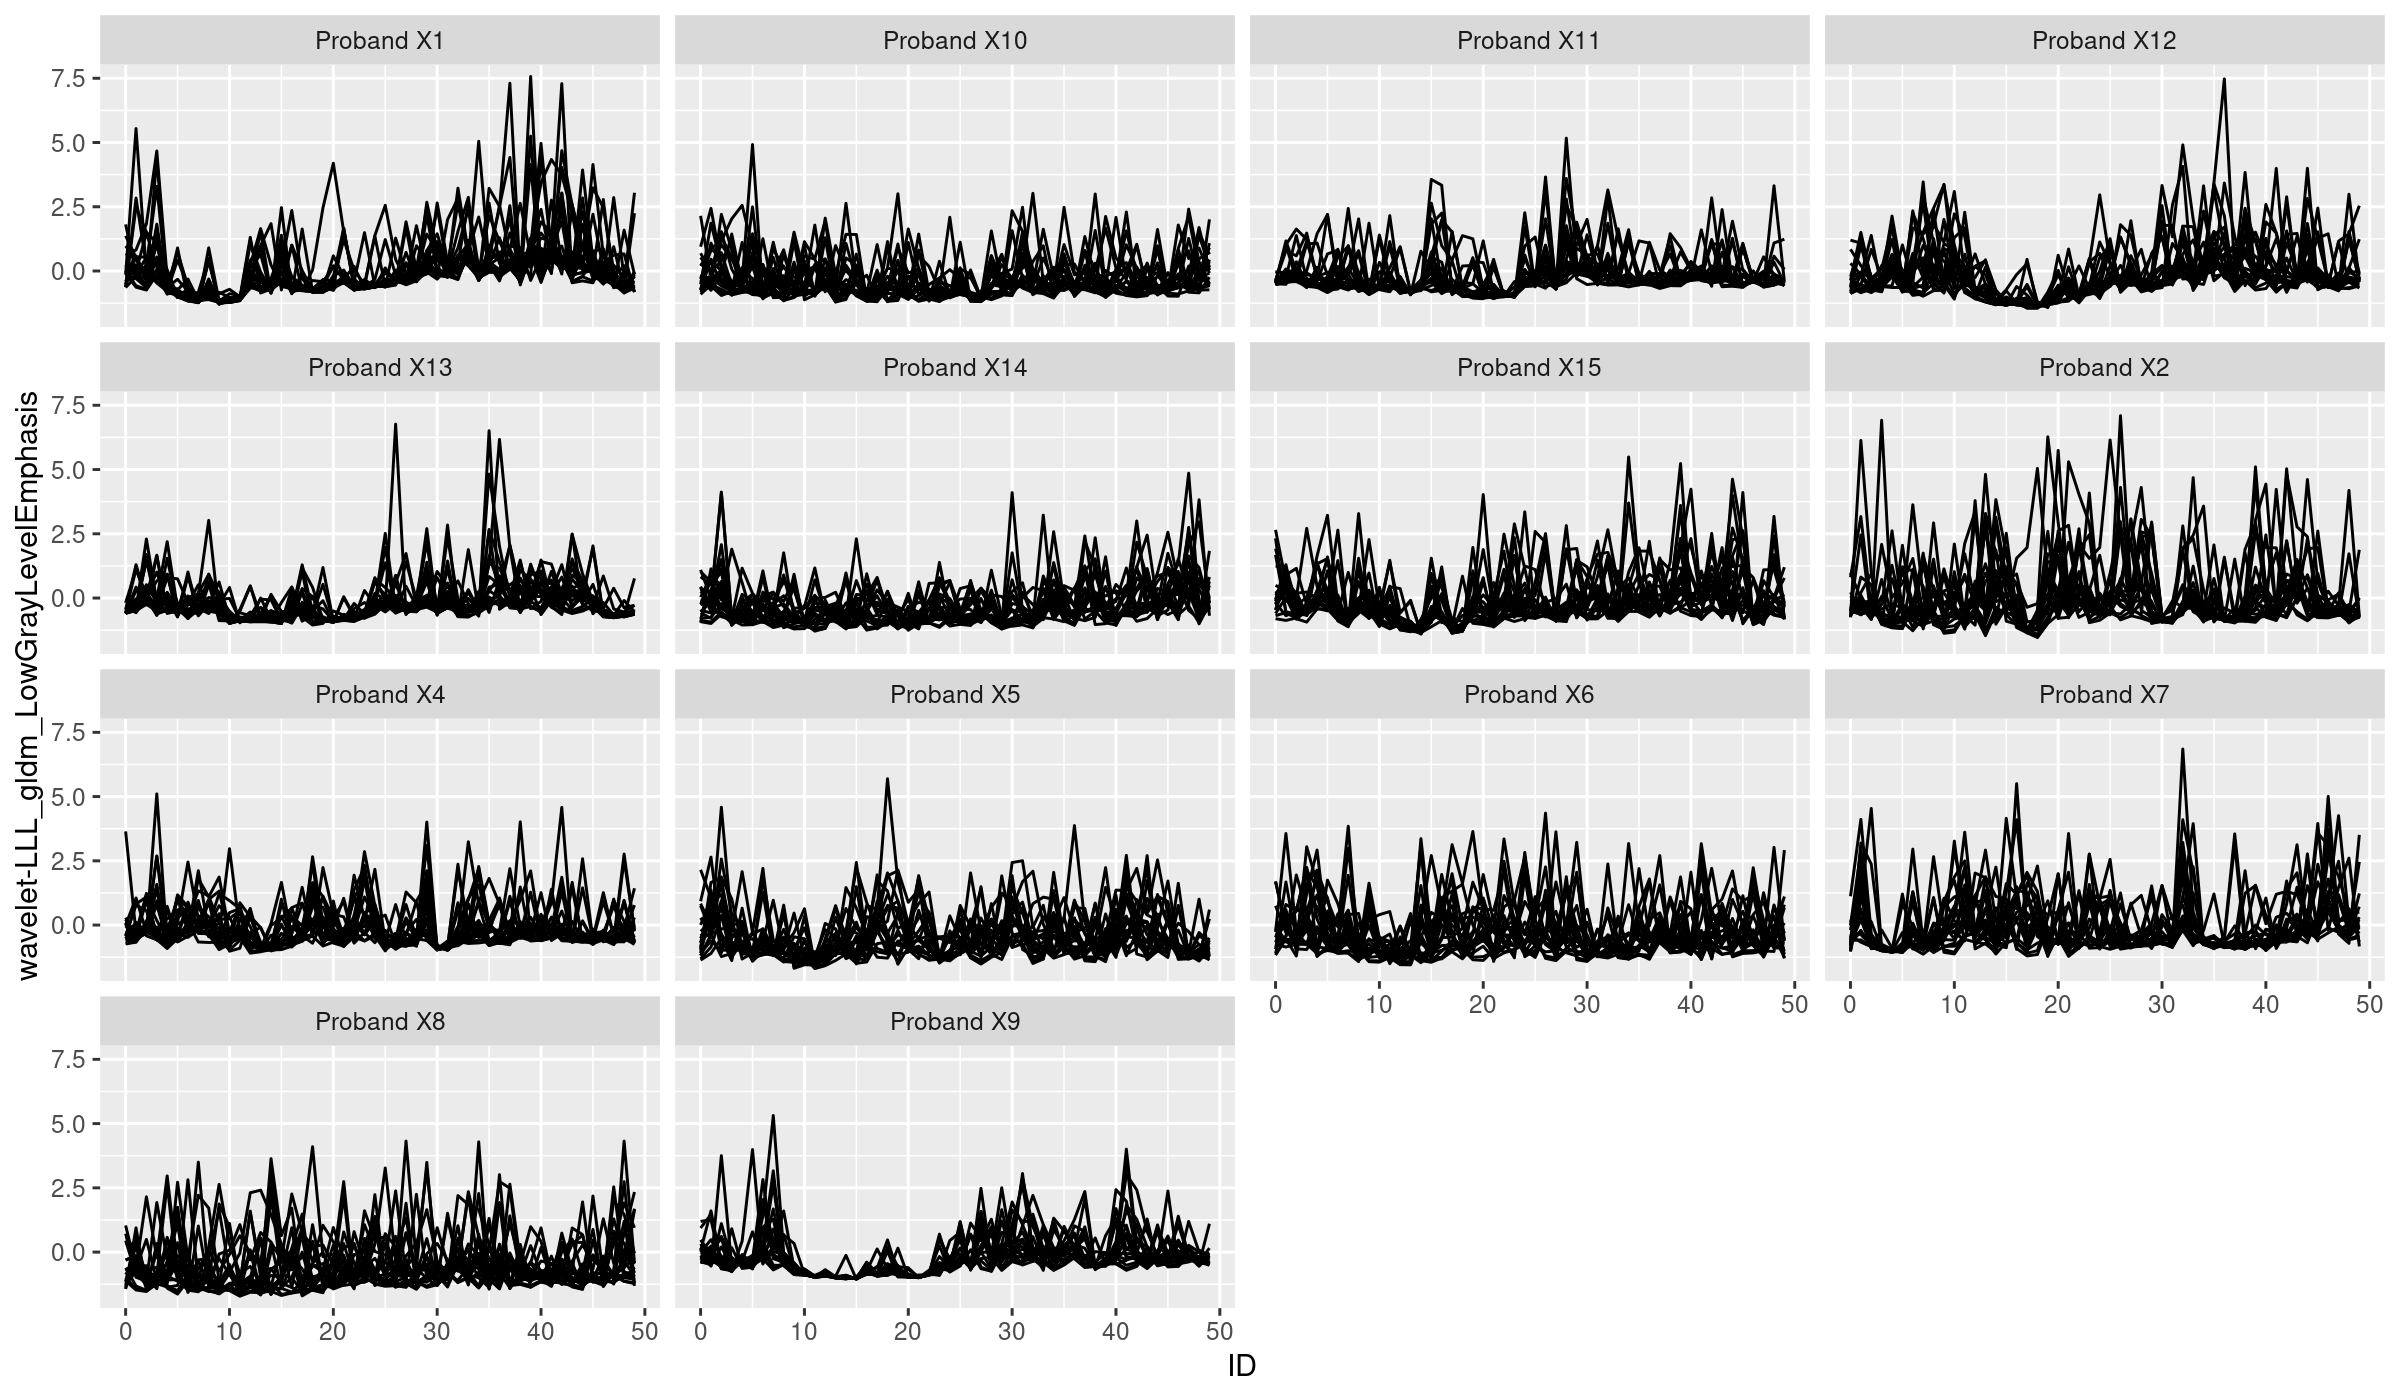

In [29]:
bae %>%
  ggplot(aes(x=ID, y=.data[[feature_name]], group=interaction(noise, seed))) + geom_line() + facet_wrap(~patient)

In [51]:
combined <- bind_rows(sim, acdc, bae)

In [84]:
ranks_combined <- bind_rows(ranks_sim, ranks_acdc, ranks_bae)

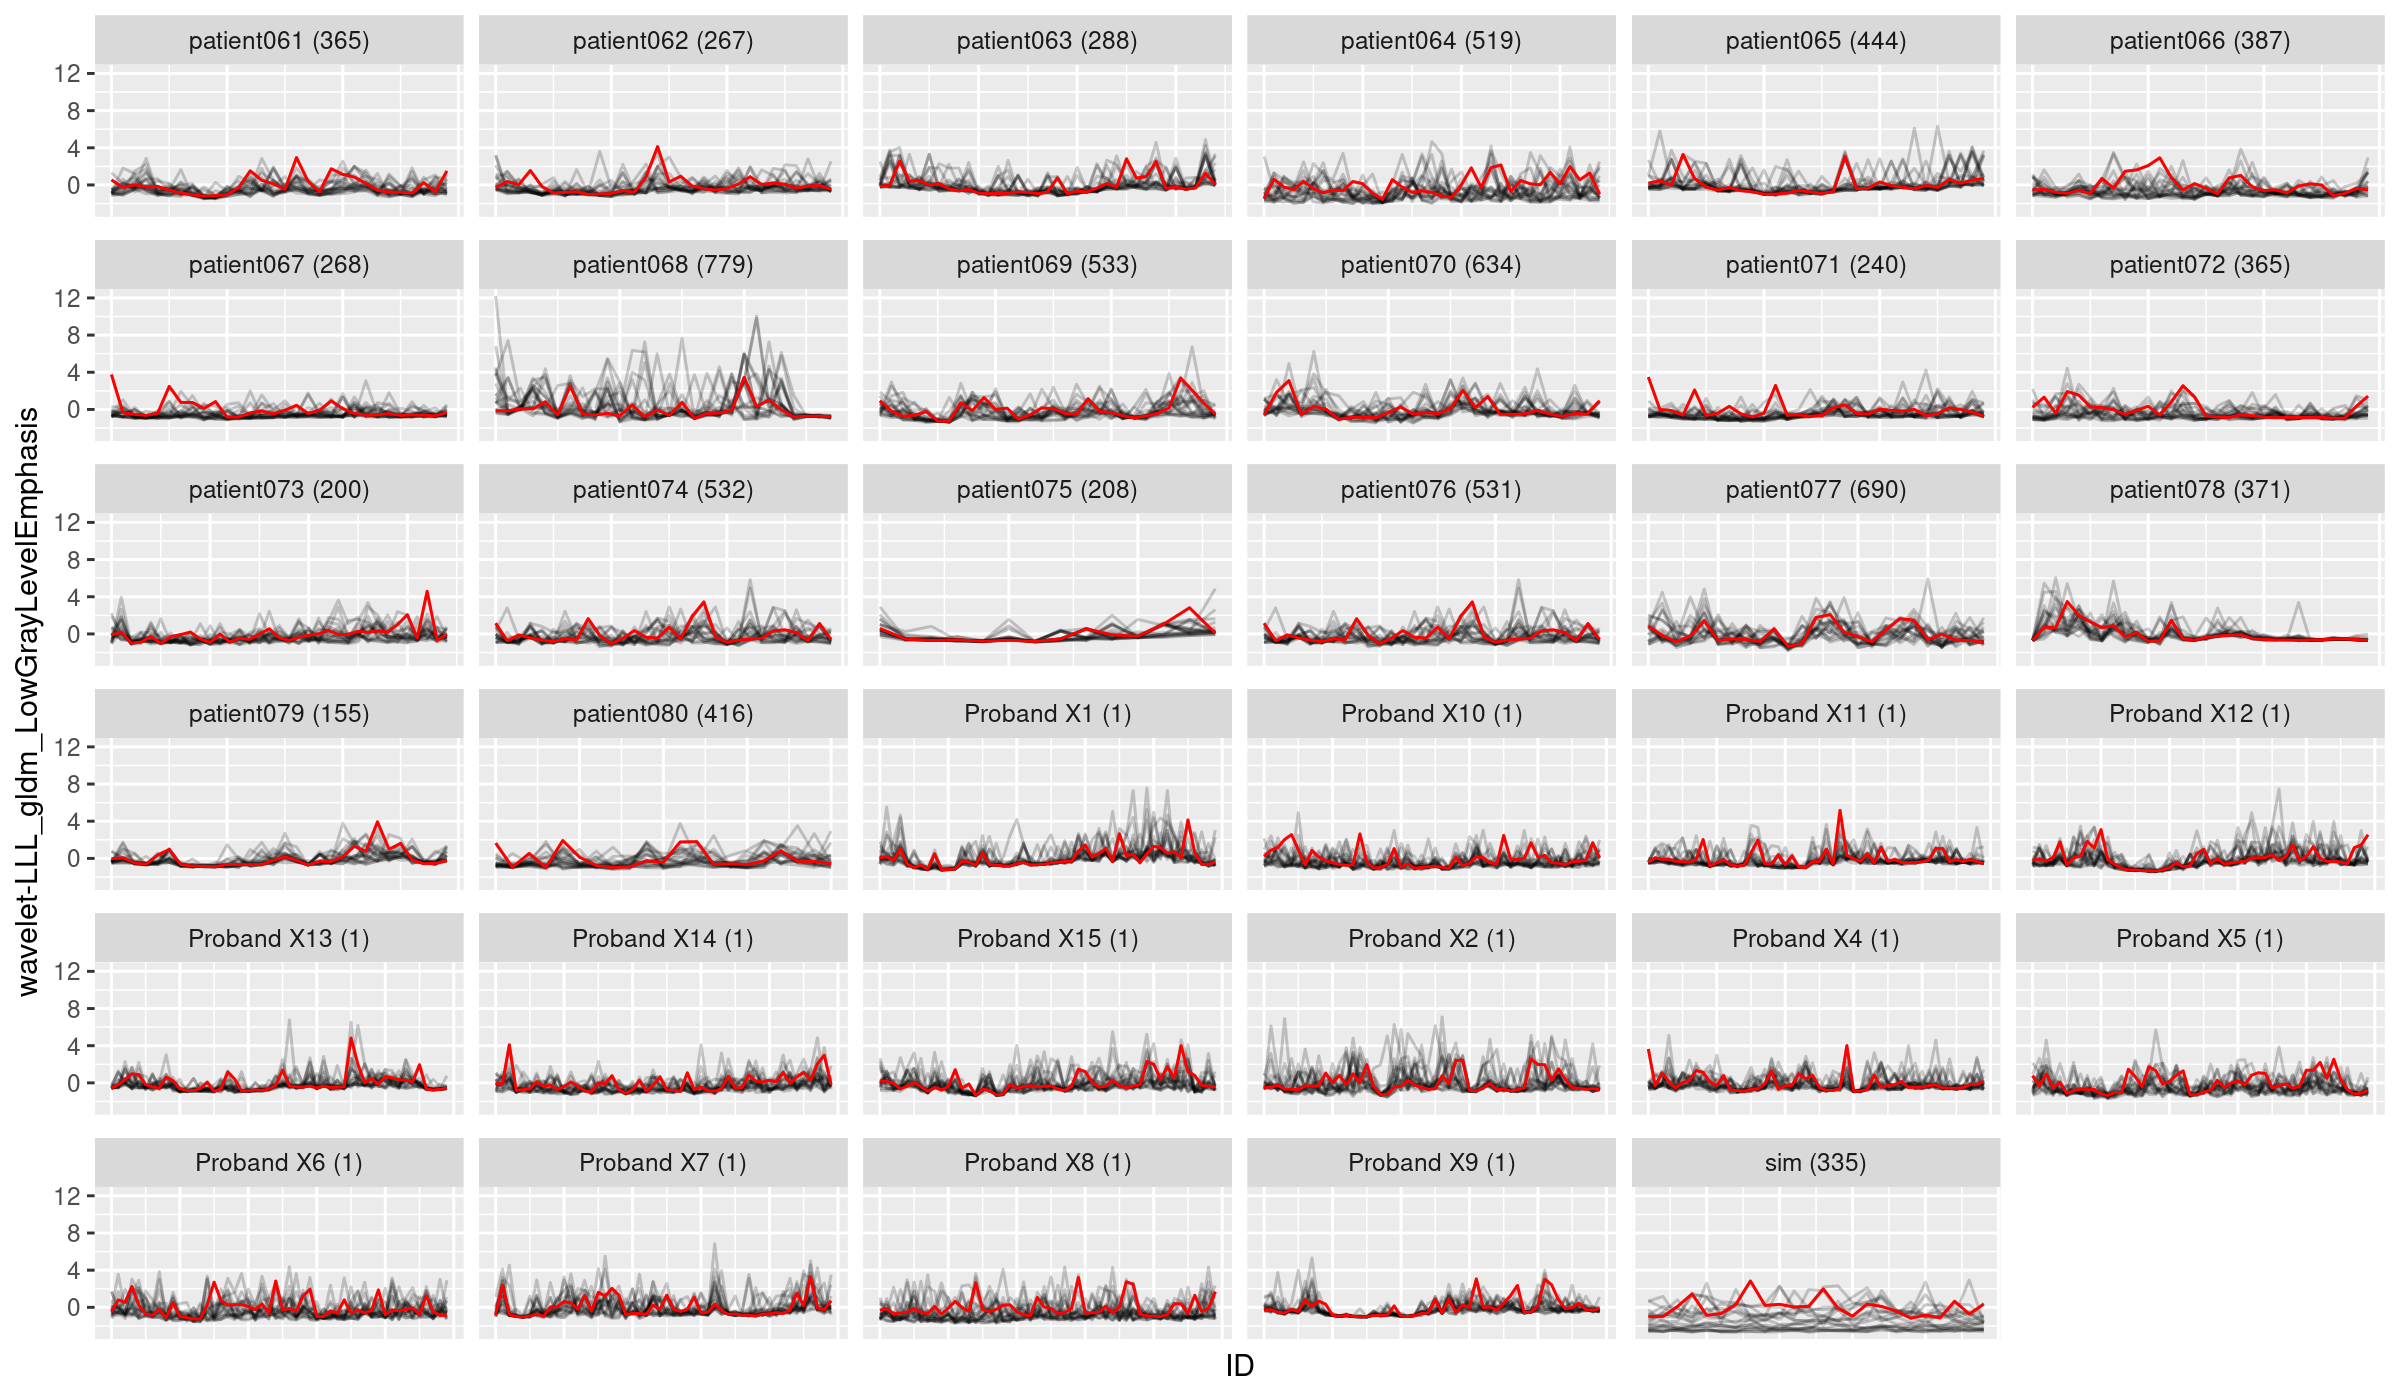

In [86]:
combined %>%
  left_join(filter(ranks_combined, Feature_name==.env$feature_name), by="patient") %>%
  mutate(patient = glue::glue("{patient} ({rank})")) %>%
  ggplot(aes(x=ID, y=.data[[feature_name]], group=interaction(noise, seed))) +
    geom_line(alpha=.2) +
    geom_line(data = ~filter(., parse_number(noise)==0 | (noise=="snr30" & parse_number(seed)==1)), color="red") +
    facet_wrap(~patient, scales="free_x") + theme(axis.text.x = element_blank(), axis.ticks.x = element_blank())

In [91]:
make_comparison_plot <- function(feature_name){
  combined %>%
    left_join(filter(ranks_combined, Feature_name==.env$feature_name), by="patient") %>%
    mutate(patient = glue::glue("{patient} ({rank})")) %>%
    ggplot(aes(x=ID, y=.data[[feature_name]], group=interaction(noise, seed))) +
      geom_line(alpha=.2) +
      geom_line(data = ~filter(., parse_number(noise)==0 | (noise=="snr30" & parse_number(seed)==1)), color="red") +
      facet_wrap(~patient, scales="free_x") + theme(axis.text.x = element_blank(), axis.ticks.x = element_blank())
}

In [96]:
ranks <- ranks_sim %>% drop_na

In [100]:
pdf("tmp_comparison_plots.pdf", onefile = TRUE)
for (i in unique(fct_reorder(ranks$Feature_name, ranks$rank))) {
  print(make_comparison_plot(i))
}
dev.off()